####################Introduction to artificial neural networks in Python#############

In [1]:
#Use NN to and X-rays to classify the problem-disease in heart,lungs etc

In [2]:
#denser material - the more absorptiona and darker the image

In [3]:
# The glob module finds all the pathnames matching a specified pattern
#glob is to open/loop over files
#os operating system style command to read files
from glob import glob
import os


In [4]:
# If your dataset is compressed, unzip with:
#!unzip chest_xrays.zip

In [5]:
# Define folders containing images
data_path = os.path.join("chest_xrays")
effusion_path = os.path.join(data_path, "effusion", "*.png")
normal_path = os.path.join(data_path, "normal", "*.png")

# Create list of files
effusion_list = glob(effusion_path)
normal_list = glob(normal_path)

print('Number of cases with pleural effusion: ', len(effusion_list)) 
print('Number of normal cases: ', len(normal_list))

Number of cases with pleural effusion:  350
Number of normal cases:  350


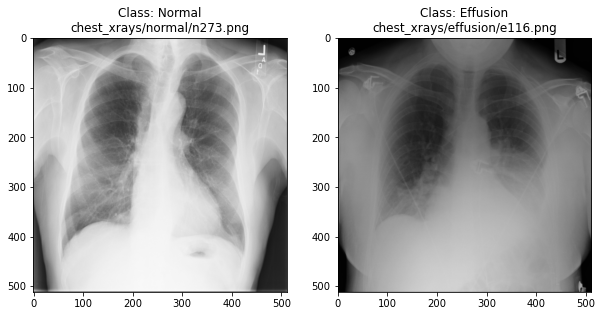

In [6]:
# cv2 is openCV, a popular computer vision library
import cv2
from matplotlib import pyplot as plt 
import random #random package

#label of the image, loc=location we save the image
def plot_example(example, label, loc):
    image = cv2.imread(example)
    im = ax[loc].imshow(image)
    title = f"Class: {label}\n{example}"
    ax[loc].set_title(title)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 10)

# Plot a "normal" record
plot_example(random.choice(normal_list), "Normal", 0)

# Plot a record labelled with effusion
plot_example(random.choice(effusion_list), "Effusion", 1)

Effusion or not?


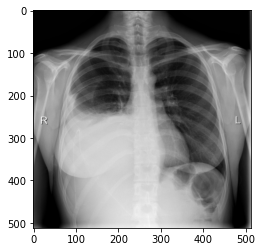

In [7]:
print("Effusion or not?")

# flip a coin
coin_flip = random.choice(["Effusion", "Normal"])
if coin_flip == "Normal":
    fn = random.choice(normal_list)
else:
    fn = random.choice(effusion_list)

# plot the image
image = cv2.imread(fn)
plt.imshow(image)

In [8]:
# Jupyter doesn't allow us to print the image until the cell has run,
# so we'll print in a new cell.
print(f"The answer is: {coin_flip}!")


The answer is: Effusion!


In [9]:
##########An image is just a matrix and the pixel is a number that defines a colour for the computer

In [10]:
import numpy as np 

file_idx = 56
example = normal_list[file_idx]#picking one file
image = cv2.imread(example)#reading it

print(image.shape)

(512, 512, 3)


In [11]:
#a 3D image i.e. height x width x depth=red x green x blue =tells us that is a colour image

In [12]:
#further https://datacarpentry.org/image-processing/

In [13]:
image = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
print(image.shape)

(512, 512)


In [14]:
#each value represents a tone-black 0, 

In [15]:
# Print a 10 by 10 chunk of the matrix
print(image[0:45, 0:45])

[[236 234 231 ... 200 201 198]
 [227 227 227 ... 193 190 191]
 [222 221 217 ... 185 181 182]
 ...
 [ 12  10  10 ...  17  17  18]
 [ 11   9   9 ...  22  23  24]
 [ 10   8   8 ...  29  31  32]]


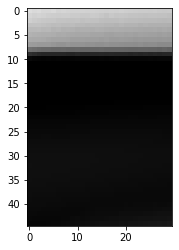

In [16]:
#plt.imshow(image,cmap='gray', vmin=0, vmax=255)-show full image
# Plot the same chunk as an image
plt.imshow(image[0:45, 10:40], cmap='gray', vmin=0, vmax=255)


In [17]:
# create a list of effusion images and labels
dataset_effusion = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE) for fn in effusion_list]#list comprehension a way to put a for loop in a single line to read each
#image from each path in effussion_list and put them into dataset_effusion list
label_effusion = np.ones(len(dataset_effusion))#list of ones in a row for our images

#1 is the target class which is effusion

# create a list of normal images and labels
dataset_normal = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE) for fn in normal_list]
label_normal = np.zeros(len(dataset_normal))

# Combine the lists into one 
dataset = dataset_effusion + dataset_normal#concatenate the list
labels = np.concatenate([label_effusion, label_normal])#concatenate the labels

In [18]:
#labels#350x1, 350x0

In [19]:
#dataset

In [20]:
#drop the resolution-down sampling to speed up the neural network

In [21]:
# Downsample the images from (512,512) to (256,256)
dataset = [cv2.resize(img, (256,256)) for img in dataset]#use opencv library and to resize each image in the dataset

# Check the size of the reshaped images
print(dataset[0].shape)

# Normalize the data
# Subtract the mean, divide by the standard deviation.
for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1)) 

(256, 256)


In [22]:
#convert from list to array
#700 images of dimensions 256x256
dataset = np.asarray(dataset, dtype=np.float32)
print(f"Matrix Dimensions: {dataset.shape}")

Matrix Dimensions: (700, 256, 256)


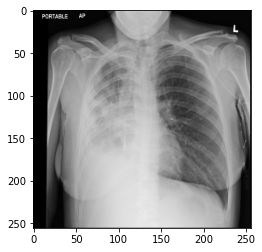

In [23]:
idx = 140#image 0
vals = dataset[idx].flatten()
plt.imshow(dataset[idx], cmap='gray', vmin=min(vals), vmax=max(vals))

In [24]:
######################Data preparation##############################################

In [25]:
#As we have done in previous projects, we 
#will want to split our data into subsets for training and testing.
#The training set is used for building our model and our test set is used for evaluation.

In [26]:
from sklearn.model_selection import train_test_split

# Our Tensorflow model requires the input to be:
# [batch, height, width, n_channels]
#batch =number of records
#n_channels=1-gray colour, 3 is for colour
# So we need to add a dimension to the dataset and labels.
# 
# Ellipsis (...) is shorthand for selecting with ":" across dimensions i.e multidimensional -select all data in all dimensions. 
# np.newaxis expands the selection by one dimension.
#adds a newaxis-new index to our data
dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]


In [27]:
# Create training and test sets
dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset, labels, test_size=0.15, random_state=42)


In [28]:
# Create a validation set
#15% of testing
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.15, random_state=42)
#use validation and train to evaluate our model
#and test dataset to test our model
print("No. images, x_dim, y_dim, colors) (No. labels, 1)\n")
print(f"Train: {dataset_train.shape}, {labels_train.shape}")
print(f"Validation: {dataset_val.shape}, {labels_val.shape}")#print the validation set from training test
print(f"Test: {dataset_test.shape}, {labels_test.shape}")

No. images, x_dim, y_dim, colors) (No. labels, 1)

Train: (505, 256, 256, 1), (505, 1)
Validation: (90, 256, 256, 1), (90, 1)
Test: (105, 256, 256, 1), (105, 1)


#Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define what kind of transformations we would like to apply
# such as rotation, crop, zoom, position shift, etc
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    zoom_range=0,
    horizontal_flip=True)

2022-10-13 14:22:18.293234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 14:22:18.379001: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Found 700 images belonging to 2 classes.


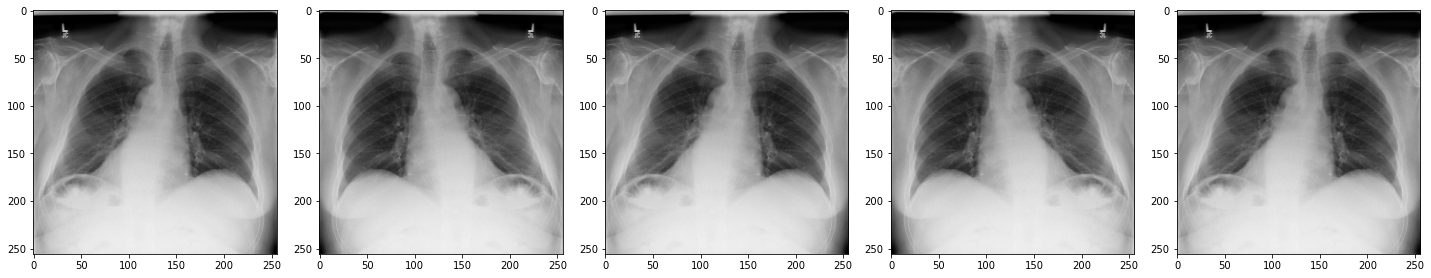

In [30]:
# specify path to source data
path = os.path.join("chest_xrays")
batch_size=5

#generator object for generating manipulated images
val_generator = datagen.flow_from_directory(
        path, color_mode="rgb",
        target_size=(256, 256),
        batch_size=batch_size)

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img.astype('uint8'))
    plt.tight_layout()
    plt.show()

augmented_images = [val_generator[0][0][0] for i in range(batch_size)]
plot_images(augmented_images)


#############################Neural networks activation##################################

In [31]:
#for images convolutional neural network is used

In [32]:
# Create the architecture of our convolutional neural network, using
# the tensorflow library
#can change architecture from papers
#i.e https://en.wikipedia.org/wiki/AlexNet
from tensorflow.random import set_seed
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Input, GlobalAveragePooling2D#user various layers
from tensorflow.keras.models import Model

# set random seed for reproducibility
set_seed(42)
 
# Our input layer should match the input shape of our images.
# A CNN takes tensors of shape (image_height, image_width, color_channels)
# We ignore the batch size when describing the input layer
# Our input images are 256 by 256, plus a single colour channel.
inputs = Input(shape=(256, 256, 1))

# Let's add the first convolutional layer
#and filters-kernel are 3x3
#can freeze layers or change activation function to 'Leaky' ReLu
x = Conv2D(filters=8, kernel_size=3, padding='same', activation='relu')(inputs)

# MaxPool layers are similar to convolution layers. 
# The pooling operation involves sliding a two-dimensional filter over each channel of feature map and selecting the max values.
# We do this to reduce the dimensions of the feature maps, helping to limit the amount of computation done by the network.
#see table https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/
x = MaxPool2D()(x)

# We will add more convolutional layers, followed by MaxPool in our network
#padding to define edge values in kernel
#8 filters -> 8 convolutions->8 images
#each kernel =3x3-9 numbers to train/learned on+weight/bias
#bias=just a number result of each kernel
x = Conv2D(filters=8, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=12, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=12, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=20, kernel_size=5, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=20, kernel_size=5, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(filters=50, kernel_size=5, padding='same', activation='relu')(x)

# Global max pooling reduces dimensions back to the input size
x = GlobalAveragePooling2D()(x)

# Finally we will add two "dense" or "fully connected layers".
# Dense layers help with the classification task, after features are extracted.
x = Dense(128, activation='relu')(x)

# Dropout is a technique to help prevent overfitting that involves deleting neurons.
#inputs units to drop out from Neuron
x = Dropout(0.6)(x)

x = Dense(32, activation='relu')(x)#32 neurons

# Our final dense layer has a single output-neuron to match the output classes.
# If we had multi-classes we would match this number to the number of classes.
#0 or 1 for our classification model
outputs = Dense(1, activation='sigmoid')(x)

# Finally, we will define our network with the input and output of the network
model = Model(inputs=inputs, outputs=outputs)

2022-10-13 14:22:20.454431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.summary()#param=number of trainable parameters i.e any parameters used to train the model and filters, i.e weights-, biases-b, filters

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 12)        876   

#Training and evaluation

In [34]:
#Use Adam optimizer of our model

In [43]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the network optimization method. 
# Adam is a popular gradient descent algorithm
# with adaptive, per-parameter learning rates.
# computes gradient and move all points to lower error
custom_adam = optimizers.Adam()

# Compile the model defining the 'loss' function type, optimization and the metric.
model.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc'])

# Save the best model found during each training of our model
checkpointer = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

# Now train our network!
# steps_per_epoch = len(dataset_train)//batch_size
#batch size-how many images much model sees before updating parameters -rule of thumb
#epochs
hist = model.fit(datagen.flow(dataset_train, labels_train, batch_size=32), 
                 steps_per_epoch=15, 
                 epochs=10, #change to more
                 validation_data=(dataset_val, labels_val), 
                 callbacks=[checkpointer])

Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 0.5011 - acc: 0.7717
Epoch 1: val_loss improved from inf to 0.44794, saving model to best_model.hdf5
15/15 [==============================] - 20s 1s/step - loss: 0.5011 - acc: 0.7717 - val_loss: 0.4479 - val_acc: 0.8222
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 0.4844 - acc: 0.7992
Epoch 2: val_loss did not improve from 0.44794
15/15 [==============================] - 20s 1s/step - loss: 0.4844 - acc: 0.7992 - val_loss: 0.4599 - val_acc: 0.8000
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 0.4828 - acc: 0.7865
Epoch 3: val_loss improved from 0.44794 to 0.43743, saving model to best_model.hdf5
15/15 [==============================] - 20s 1s/step - loss: 0.4828 - acc: 0.7865 - val_loss: 0.4374 - val_acc: 0.8111
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 0.4671 - acc: 0.8118
Epoch 4: val_loss improved from 0.43743 to 0.42398, saving model to best_mod

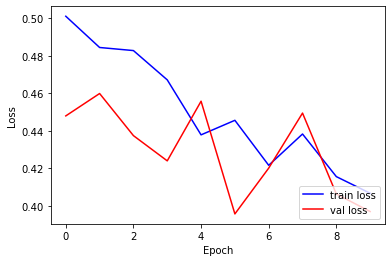

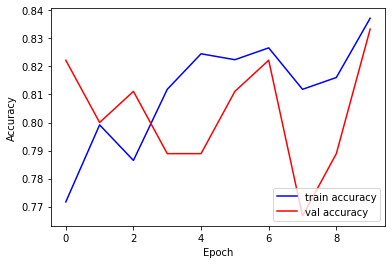

In [45]:
plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [46]:
#Evaluating your model on the held-out test set

In [47]:
from tensorflow.keras.models import load_model 

# Open the best model saved during training
best_model = load_model('best_model.hdf5')
print('\nNeural network weights updated to the best epoch.')


Neural network weights updated to the best epoch.


In [50]:
# We use the evaluate function to evaluate the accuracy of our model in the test group
print(f"Accuracy in test group: {best_model.evaluate(dataset_test, labels_test, verbose=0)[1]}")
#lines in accuracy should be following but mine donot, sign that I need to retrain, increase epochs or overfit the data
#retraining improved the model

Accuracy in test group: 0.8285714387893677


###########################Explainability###########################

In [51]:
#tools to explain decisions

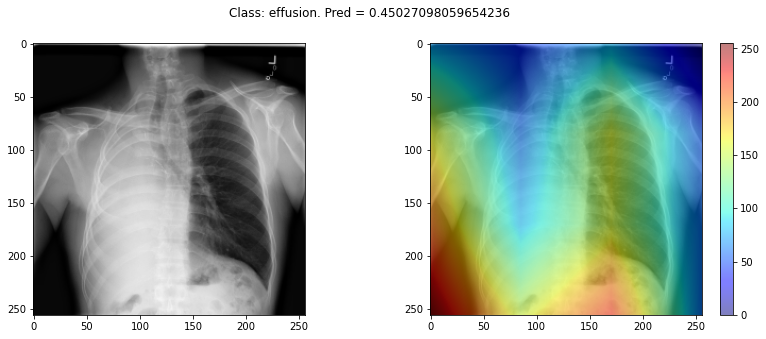

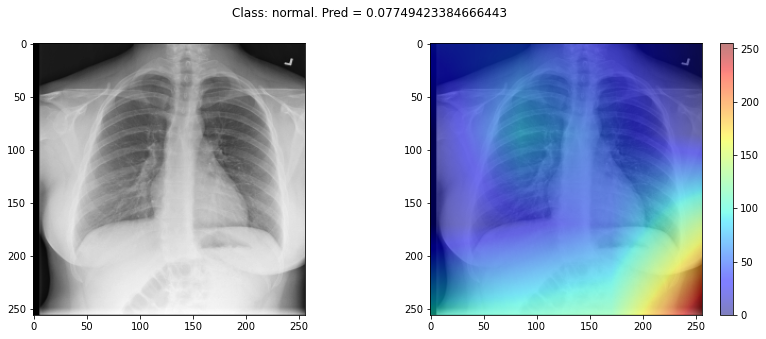

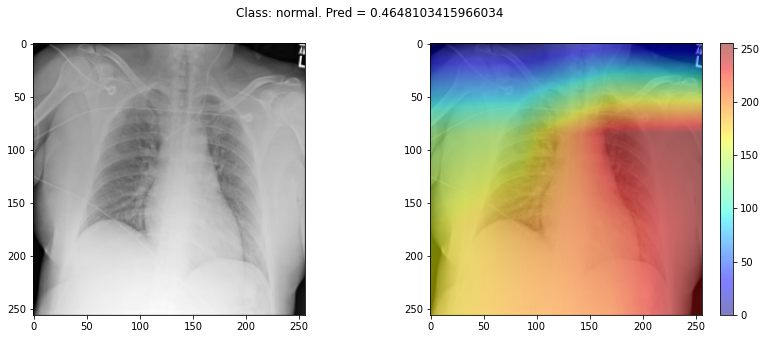

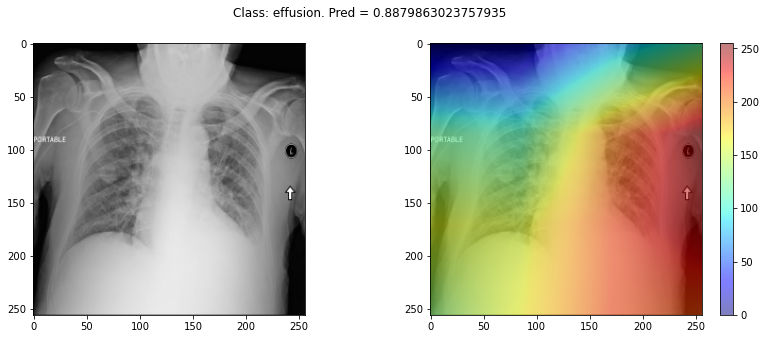

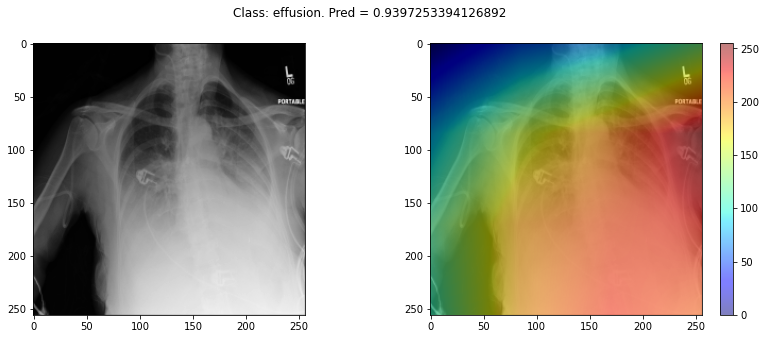

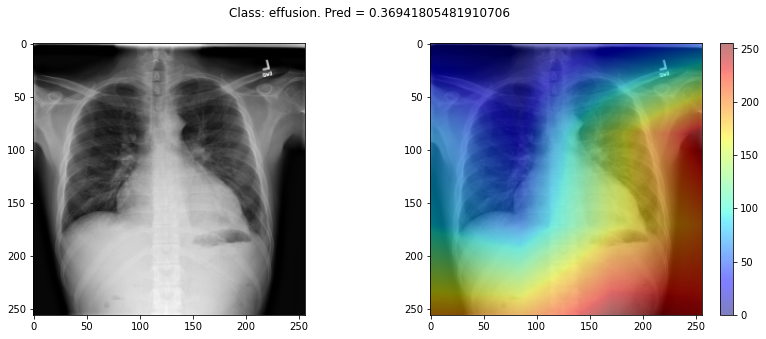

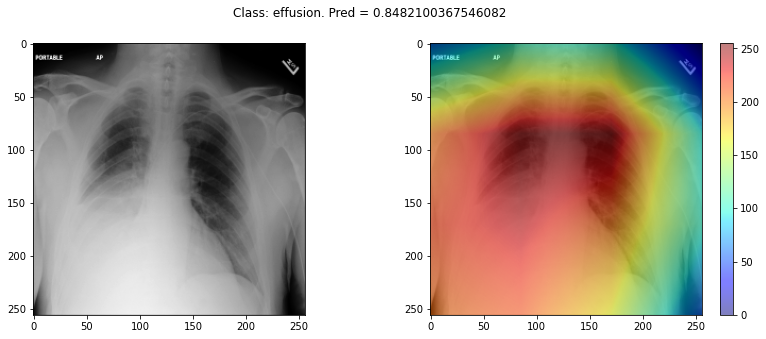

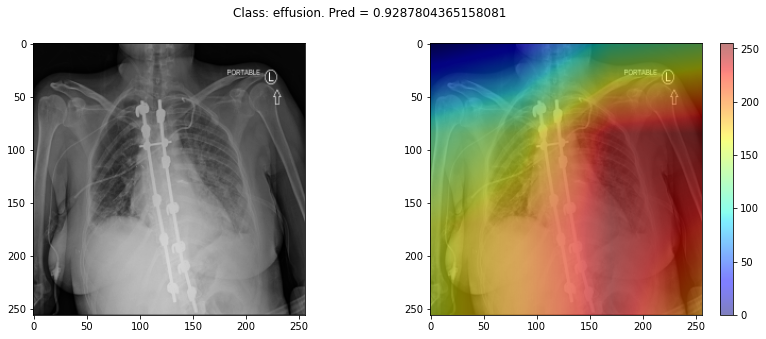

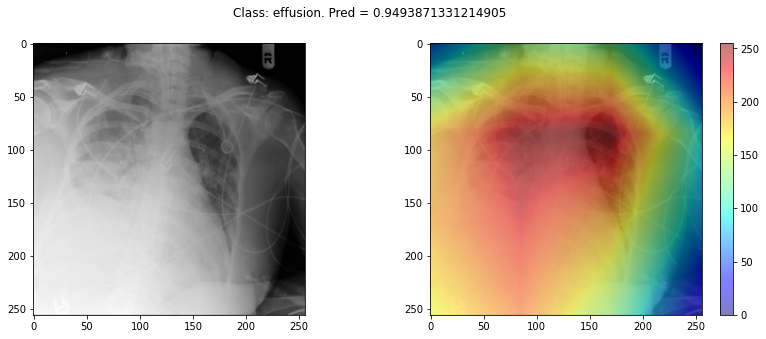

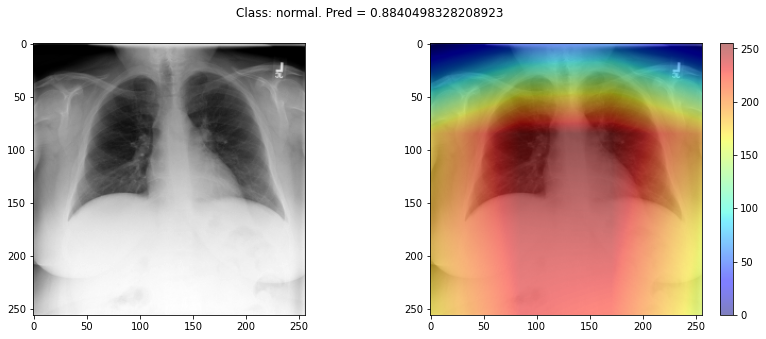

In [53]:
# !pip install tf_keras_vis
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
#Gradcam creates saliency maps

import numpy as np
from matplotlib import pyplot as plt
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils.scores import CategoricalScore

gradcam = GradcamPlusPlus(best_model, clone=True)
scorecam = Scorecam(best_model, clone=True)

def plot_map(cam, classe, prediction, img):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(np.squeeze(img), cmap='gray')
    axes[1].imshow(np.squeeze(img), cmap='gray')
    heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
    i = axes[1].imshow(heatmap,cmap="jet",alpha=0.5)
    fig.colorbar(i)
    plt.suptitle("Class: {}. Pred = {}".format(classe, prediction))
#iterating 10 images    
for image_id in range(10):
    SEED_INPUT = dataset_test[image_id]
    CATEGORICAL_INDEX = [0]

    layer_idx = 18
    penultimate_layer_idx = 13
    class_idx  = 0

    cat_score = labels_test[image_id]
    cat_score = CategoricalScore(CATEGORICAL_INDEX)
    cam = gradcam(cat_score, SEED_INPUT, 
                  penultimate_layer = penultimate_layer_idx,
                  normalize_cam=True)
    
    # Display the class
    _class = 'normal' if labels_test[image_id] == 0 else 'effusion'

    _prediction = best_model.predict(dataset_test[image_id][np.newaxis,:,...], verbose=0)
    
    plot_map(cam, _class, _prediction[0][0], SEED_INPUT)

In [54]:
#remember we classified <0.5= normal and >0.5=effusion in lung

In [55]:
#Don’t Take Saliency Maps As Gospel

2/2 [==============================] - 0s 79ms/step


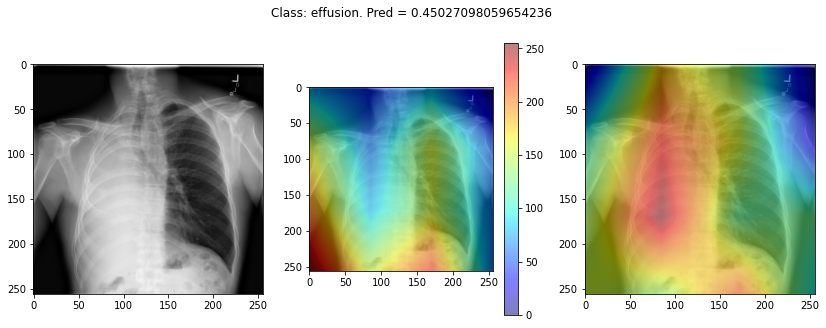

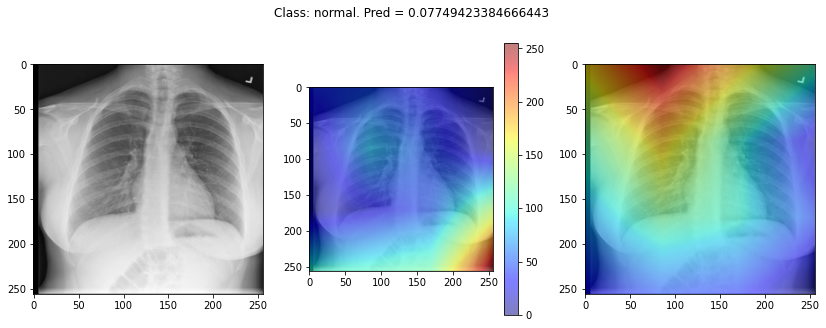

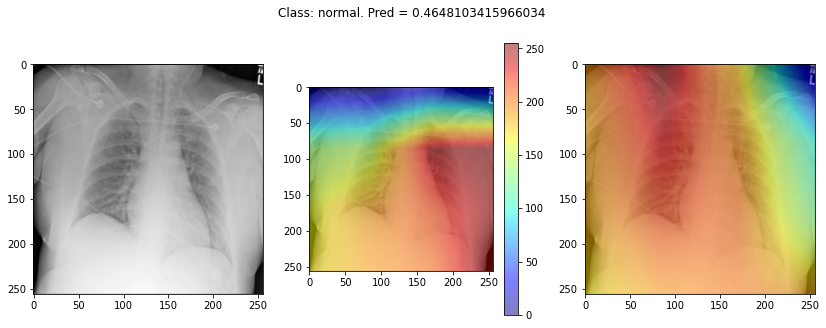

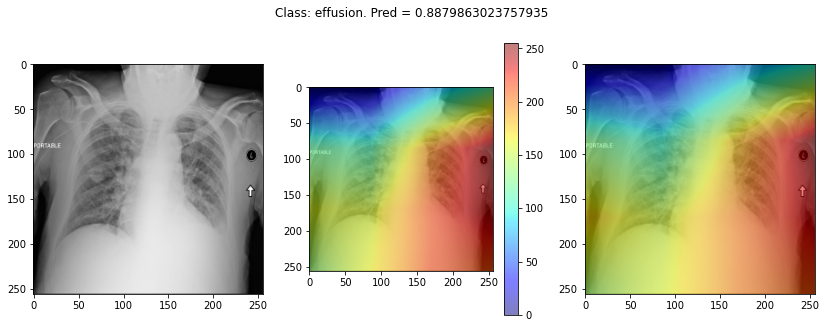

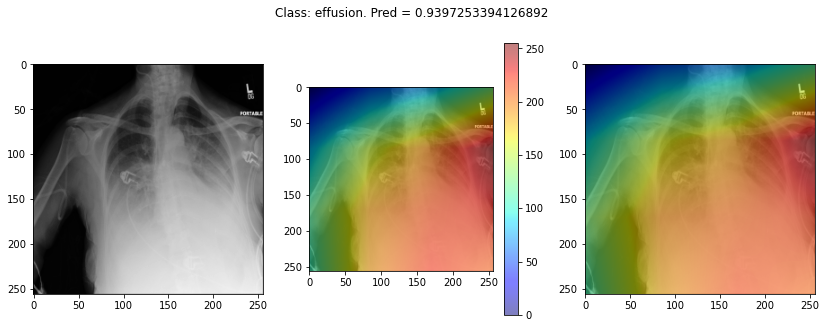

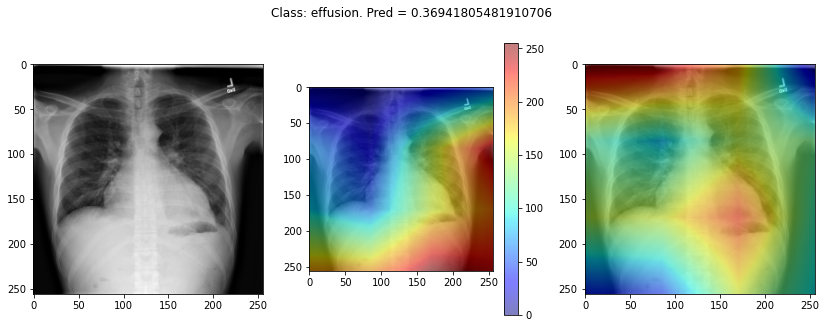

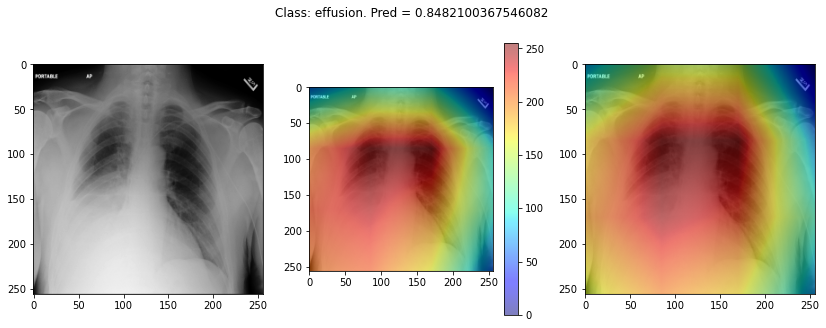

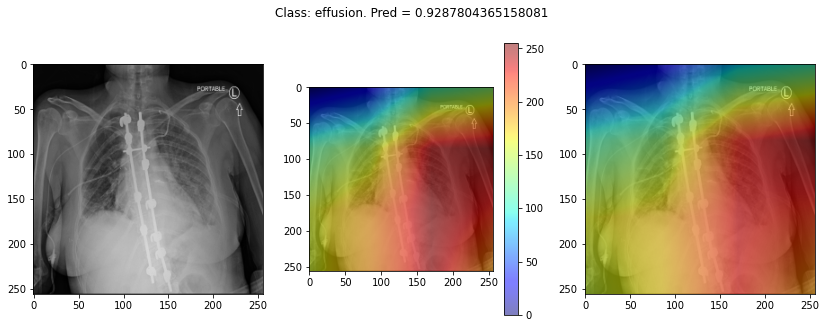

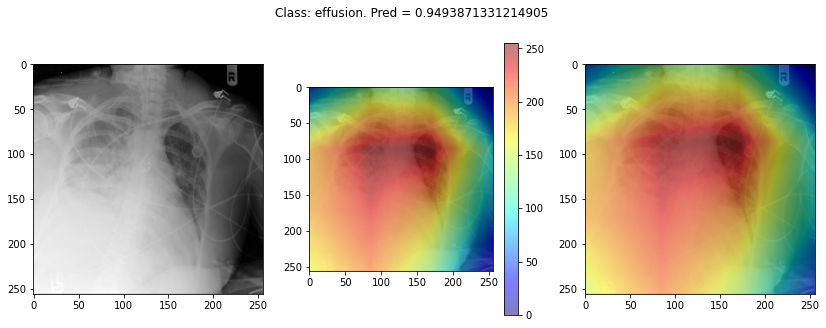

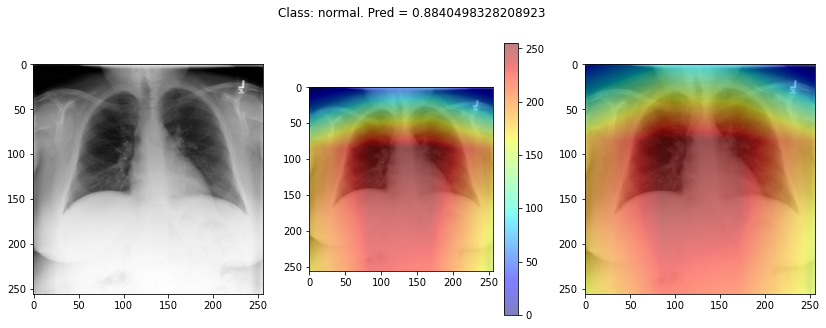

In [57]:
def plot_map2(cam1, cam2, classe, prediction, img):
    fig, axes = plt.subplots(1,3,figsize=(14,5))
    axes[0].imshow(np.squeeze(img), cmap='gray')
    axes[1].imshow(np.squeeze(img), cmap='gray')
    axes[2].imshow(np.squeeze(img), cmap='gray')
    heatmap1 = np.uint8(cm.jet(cam1[0])[..., :3] * 255)
    heatmap2 = np.uint8(cm.jet(cam2[0])[..., :3] * 255)
    i = axes[1].imshow(heatmap1,cmap="jet",alpha=0.5)
    j = axes[2].imshow(heatmap2,cmap="jet",alpha=0.5)
    fig.colorbar(i)
    plt.suptitle("Class: {}. Pred = {}".format(classe, prediction))
    
for image_id in range(10):
    SEED_INPUT = dataset_test[image_id]
    CATEGORICAL_INDEX = [0]

    layer_idx = 18
    penultimate_layer_idx = 13
    class_idx  = 0

    cat_score = labels_test[image_id]
    cat_score = CategoricalScore(CATEGORICAL_INDEX)
    cam = gradcam(cat_score, SEED_INPUT, 
                  penultimate_layer = penultimate_layer_idx,
                  normalize_cam=True)
    cam2 = scorecam(cat_score, SEED_INPUT, 
                  penultimate_layer = penultimate_layer_idx,
                  normalize_cam=True
                  )
    
    # Display the class
    _class = 'normal' if labels_test[image_id] == 0 else 'effusion'

    _prediction = best_model.predict(dataset_test[image_id][np.newaxis,:,...], verbose=0)
    
    plot_map2(cam, cam2, _class, _prediction[0][0], SEED_INPUT)